In [1]:
import pandas as pd
import re
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/산불데이터에코드매핑+좌표.csv')


In [3]:
# 위도/경도 추출 함수
def extract_lat_lon(coord_str):
    match = re.search(r"POINT\s*\(([-\d\.]+)\s+([-\d\.]+)\)", str(coord_str))
    if match:
        lon = float(match.group(1))
        lat = float(match.group(2))
        return pd.Series([lat, lon])
    return pd.Series([None, None])


In [4]:
# 좌표 컬럼 생성
df[['lat', 'lon']] = df['REP_COORD'].apply(extract_lat_lon)


In [5]:
# 결측치 제거, 복사
df_clean = df.dropna(subset=['lat', 'lon']).copy()


In [6]:
# KMeans++ 클러스터링 (k=31 (헬기 총 대수))
coords = df_clean[['lat', 'lon']]
k = 31
kmeans_plus = KMeans(n_clusters=k, init='k-means++', random_state=42)
df_clean['cluster'] = kmeans_plus.fit_predict(coords)
centers = kmeans_plus.cluster_centers_


In [7]:
# 평균 거리
avg_distances = []

for i in range(k):
    cluster_points = df_clean[df_clean['cluster'] == i][['lat', 'lon']].values
    center = centers[i]
    # 거리 계산 (유클리드 거리)
    dists = np.sqrt(np.sum((cluster_points - center) ** 2, axis=1))
    avg_dist = np.mean(dists)
    avg_distances.append({
        'cluster': i,
        'center_lat': center[0],
        'center_lon': center[1],
        'num_fires': len(cluster_points),
        'avg_distance': avg_dist
    })

# DataFrame으로 정리
df_cluster_summary = pd.DataFrame(avg_distances)
df_cluster_summary = df_cluster_summary.sort_values(by='avg_distance', ascending=False)

In [8]:
df_cluster_summary.head(31)

,cluster,center_lat,center_lon,num_fires,avg_distance
18,18,34.397878,126.425171,21,0.432917
0,0,34.819646,127.281456,67,0.265175
22,22,38.079357,128.208086,32,0.256759
26,26,36.539834,128.070958,45,0.246838
27,27,37.218989,129.061504,39,0.240271
13,13,35.199665,128.898194,86,0.237778
8,8,37.068576,128.368546,36,0.236201
6,6,35.191565,128.106016,65,0.234075
20,20,36.288892,129.320979,35,0.221758
3,3,36.683888,128.836088,42,0.220444


In [9]:
df_cluster_summary['avg_distance'].describe()

count    31.000000
mean      0.207175
std       0.058415
min       0.056843
25%       0.188995
50%       0.206424
75%       0.227916
max       0.432917
Name: avg_distance, dtype: float64

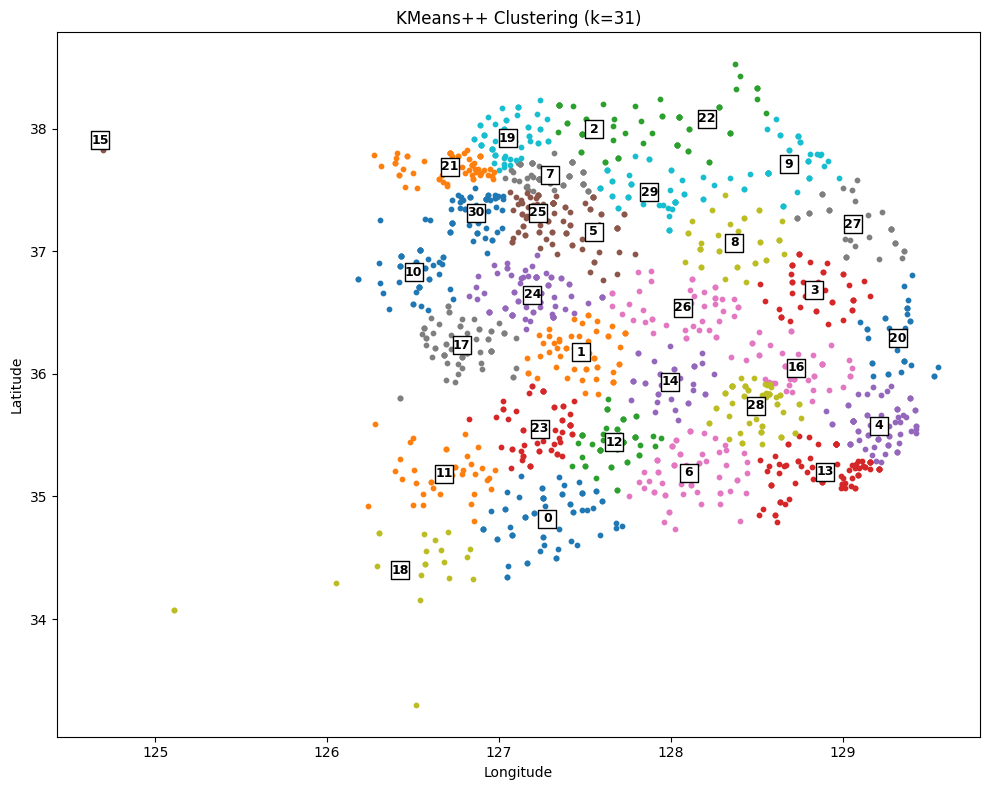

In [10]:
# 시각화
plt.figure(figsize=(10, 8))

for i in range(k):
    cluster_points = df_clean[df_clean['cluster'] == i]
    plt.scatter(cluster_points['lon'], cluster_points['lat'], s=10)

plt.scatter(centers[:, 1], centers[:, 0], c='white', edgecolors='black', marker='s', s=150, label='Centers')

# 중심점 위에 클러스터 번호 텍스트 표시
for i, (lat, lon) in enumerate(centers):
    plt.text(lon, lat, str(i), fontsize=9, color='black', ha='center', va='center', fontweight='bold')

plt.title(f'KMeans++ Clustering (k={k})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(False)
plt.tight_layout()
plt.show()

In [11]:

# KMeans++ 클러스터링 (k=16 (헬기 보유 기관 수(중앙119 제외)))
coords = df_clean[['lat', 'lon']]
k = 16
kmeans_plus = KMeans(n_clusters=k, init='k-means++', random_state=42)
df_clean['cluster'] = kmeans_plus.fit_predict(coords)
centers = kmeans_plus.cluster_centers_


In [12]:
# 평균 거리
avg_distances = []

for i in range(k):
    cluster_points = df_clean[df_clean['cluster'] == i][['lat', 'lon']].values
    center = centers[i]
    # 거리 계산 (유클리드 거리)
    dists = np.sqrt(np.sum((cluster_points - center) ** 2, axis=1))
    avg_dist = np.mean(dists)
    avg_distances.append({
        'cluster': i,
        'center_lat': center[0],
        'center_lon': center[1],
        'num_fires': len(cluster_points),
        'avg_distance': avg_dist
    })

# DataFrame으로 정리
df_cluster_summary = pd.DataFrame(avg_distances)
df_cluster_summary = df_cluster_summary.sort_values(by='avg_distance', ascending=False)

In [13]:
df_cluster_summary.head(31)

,cluster,center_lat,center_lon,num_fires,avg_distance
14,14,34.868679,126.571646,58,0.444831
3,3,36.692438,129.048109,82,0.343393
5,5,36.993782,128.212070,73,0.332682
10,10,35.444419,127.744126,143,0.321962
0,0,34.980803,127.249264,93,0.319995
2,2,37.981657,128.083840,55,0.319992
1,1,36.470740,127.410729,130,0.307637
7,7,37.503400,126.731100,117,0.301162
9,9,35.210761,128.639506,89,0.293156
15,15,35.974017,128.445188,117,0.289195


In [14]:
df_cluster_summary['avg_distance'].describe()

count    16.000000
mean      0.300899
std       0.050787
min       0.220504
25%       0.271731
50%       0.297159
75%       0.320487
max       0.444831
Name: avg_distance, dtype: float64

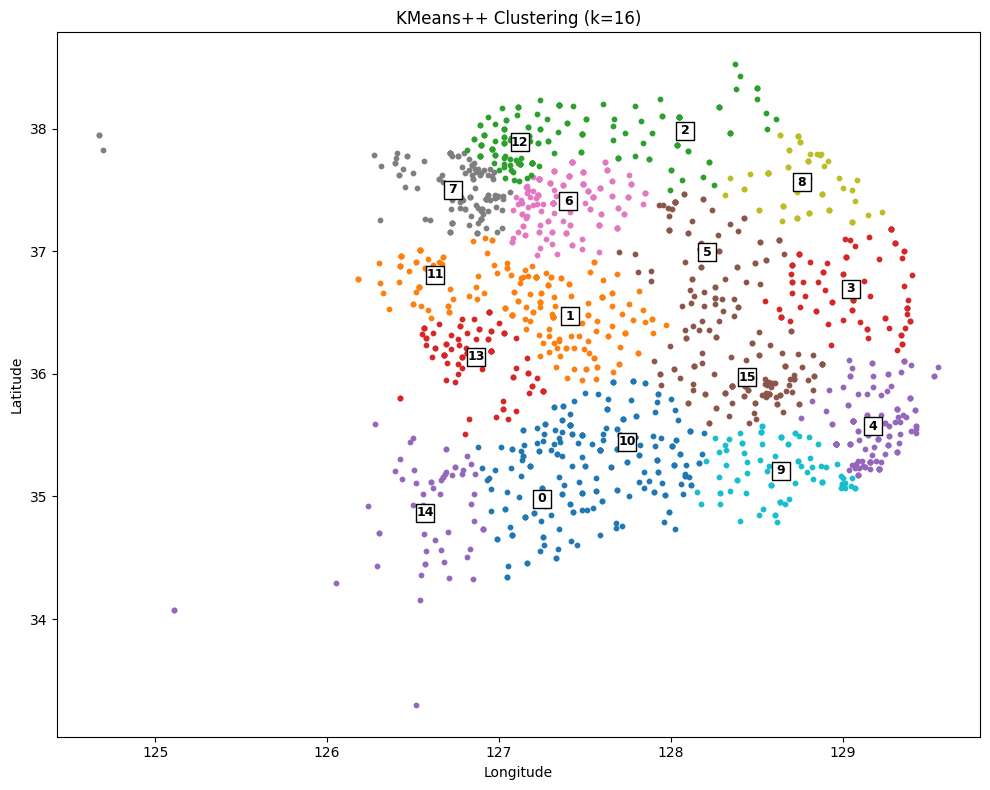

In [15]:
# 시각화
plt.figure(figsize=(10, 8))

for i in range(k):
    cluster_points = df_clean[df_clean['cluster'] == i]
    plt.scatter(cluster_points['lon'], cluster_points['lat'], s=10)

plt.scatter(centers[:, 1], centers[:, 0], c='white', edgecolors='black', marker='s', s=150, label='Centers')

# 중심점 위에 클러스터 번호 텍스트 표시
for i, (lat, lon) in enumerate(centers):
    plt.text(lon, lat, str(i), fontsize=9, color='black', ha='center', va='center', fontweight='bold')

plt.title(f'KMeans++ Clustering (k={k})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(False)
plt.tight_layout()
plt.show()